In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
df1=pd.read_csv('SMS_train.csv',encoding='ISO_8859-1')
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [3]:
df2=pd.read_csv('SMS_test.csv',encoding='ISO_8859-1')
df2

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [4]:
df=pd.concat([df1,df2],axis=0)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [5]:
df.shape

(1082, 3)

In [6]:
df.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [7]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [8]:
df.tail()

,S. No.,Message_body,Label
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [9]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [10]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [11]:
df['Label'].value_counts()

Label
Non-Spam    884
Spam        198
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

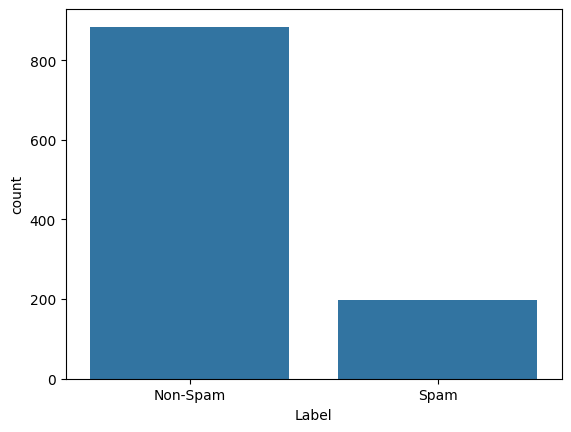

In [12]:
sns.countplot(x=df['Label'])

In [13]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [14]:
#replacing label
df['Label']=df['Label'].map({'Spam':1,'Non-Spam':0})
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
121,Try to do something dear. You read something f...,0
122,Sun ah... Thk mayb can if dun have anythin on....,0
123,"SYMPTOMS when U are in love: ""1.U like listeni...",0


In [15]:
message=df.Message_body
message

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [16]:
#white space
message = message.str.replace(r'\s+', ' ', regex=True).str.strip()
message

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [17]:
#tokenisation 
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
message=message.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
message


0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear . You read something ...
122    Sun ah ... Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love : " 1 . U like lis...
124    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

In [18]:
#removing special characters
message=message.str.replace('[^A-Za-z0-9]',' ',regex=True)
message

0                            Rofl   Its true to its name
1      The guy did some bitching but I acted like i d...
2      Pity     was in mood for that   So     any oth...
3                  Will   b going to esplanade fr home  
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear   You read something ...
122    Sun ah     Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love     1   U like lis...
124    Great   Have a safe trip   Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

In [19]:
#stemming
from nltk.stem import SnowballStemmer
st=SnowballStemmer('english')
message=message.apply(lambda x:[st.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
message



0                                rofl it true to it name
1      the guy did some bitch but i act like i d be i...
2         piti was in mood for that so ani other suggest
3                          will b go to esplanad fr home
4      this is the 2nd time we have tri 2 contact u u...
                             ...                        
120    7 wonder in my world 7th you 6th ur style 5th ...
121       tri to do someth dear you read someth for exam
122    sun ah thk mayb can if dun have anythin on thk...
123    symptom when u are in love 1 u like listen son...
124        great have a safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [20]:
#stop words
from nltk.corpus import stopwords
sp=stopwords.words('english')
message=message.apply(lambda x:[i for i in tk.tokenize(x) if i not in sp]).apply(lambda x:' '.join(x))
message

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                                  piti mood ani suggest
3                                  b go esplanad fr home
4      2nd time tri 2 contact u u 750 pound prize 2 c...
                             ...                        
120    7 wonder world 7th 6th ur style 5th ur smile 4...
121                     tri someth dear read someth exam
122    sun ah thk mayb dun anythin thk book e lesson ...
123    symptom u love 1 u like listen song 2 u get st...
124                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [21]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vd=TfidfVectorizer()
data=vd.fit_transform(message)
data

<1082x2997 sparse matrix of type '<class 'numpy.float64'>'
	with 9599 stored elements in Compressed Sparse Row format>

In [22]:
y=df['Label'].values

In [23]:
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)

In [24]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=7)
naive=MultinomialNB()
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(n_estimators=100)
model=[knn,naive,sv,dt,rf]

In [25]:
for i in model:
    i.fit(x_train,y_train)
    print(i,'*'*10)
    y_pred=i.predict(x_test)
    print(classification_report(y_test,y_pred))


KNeighborsClassifier(n_neighbors=7) **********
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       269
           1       0.97      0.50      0.66        56

    accuracy                           0.91       325
   macro avg       0.94      0.75      0.80       325
weighted avg       0.92      0.91      0.90       325

MultinomialNB() **********
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       269
           1       1.00      0.64      0.78        56

    accuracy                           0.94       325
   macro avg       0.97      0.82      0.87       325
weighted avg       0.94      0.94      0.93       325

SVC() **********
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       269
           1       1.00      0.61      0.76        56

    accuracy                           0.93       325
   macro avg       0.96      0.80    